In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import nltk
import seaborn as sns
import re

In [4]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

print("Number of data points in training data:", df_train.shape[0])
print("Number of data points in test data:", df_test.shape[0])

df_train.head()

Number of data points in training data: 1306122
Number of data points in test data: 375806


,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [5]:
# Checking for null values.

df_train['question_text'].isnull().sum(), df_test['question_text'].isnull().sum()

(0, 0)

### 1.1 Distribution of Data Points

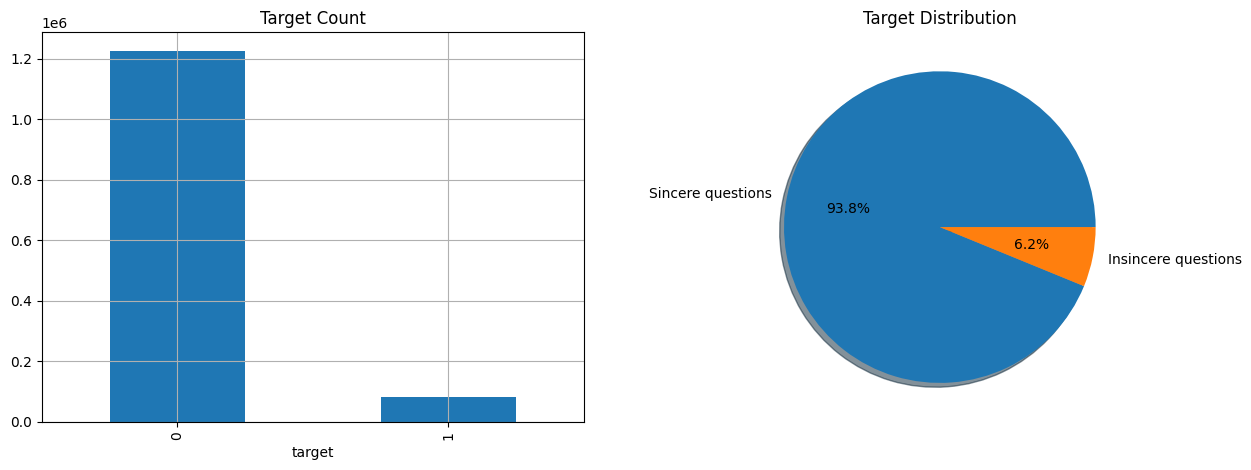

In [6]:
# Bar chart
plt.subplot(1, 2, 1)
df_train.groupby('target')['qid'].count().plot.bar()
plt.grid(True)
plt.title('Target Count')
plt.subplots_adjust(right=1.9)

# Pie Chart
plt.subplot(1, 2, 2)
values = [df_train[df_train['target']==0].shape[0], df_train[df_train['target']==1].shape[0]]
labels = ['Sincere questions', 'Insincere questions']

plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Target Distribution')
plt.tight_layout()
plt.subplots_adjust(right=1.9)
plt.show()

Observations:

- Data is highly imbalanced with only 6.2% of insincere questions.

### 1.2 Word cloud for both sincere and insincere questions

In [7]:
def display_wordcloud(data, title):
    words_list = data.unique().tolist()
    words = ' '.join(words_list)
    
    wordcloud = WordCloud(width = 800, height = 400,
                      stopwords = set(STOPWORDS)).generate(words)

    plt.figure(figsize=(20, 12), facecolor=None)
    plt.imshow(wordcloud)
    plt.title(f'Words in {title}')
    plt.axis("off")
    plt.show()

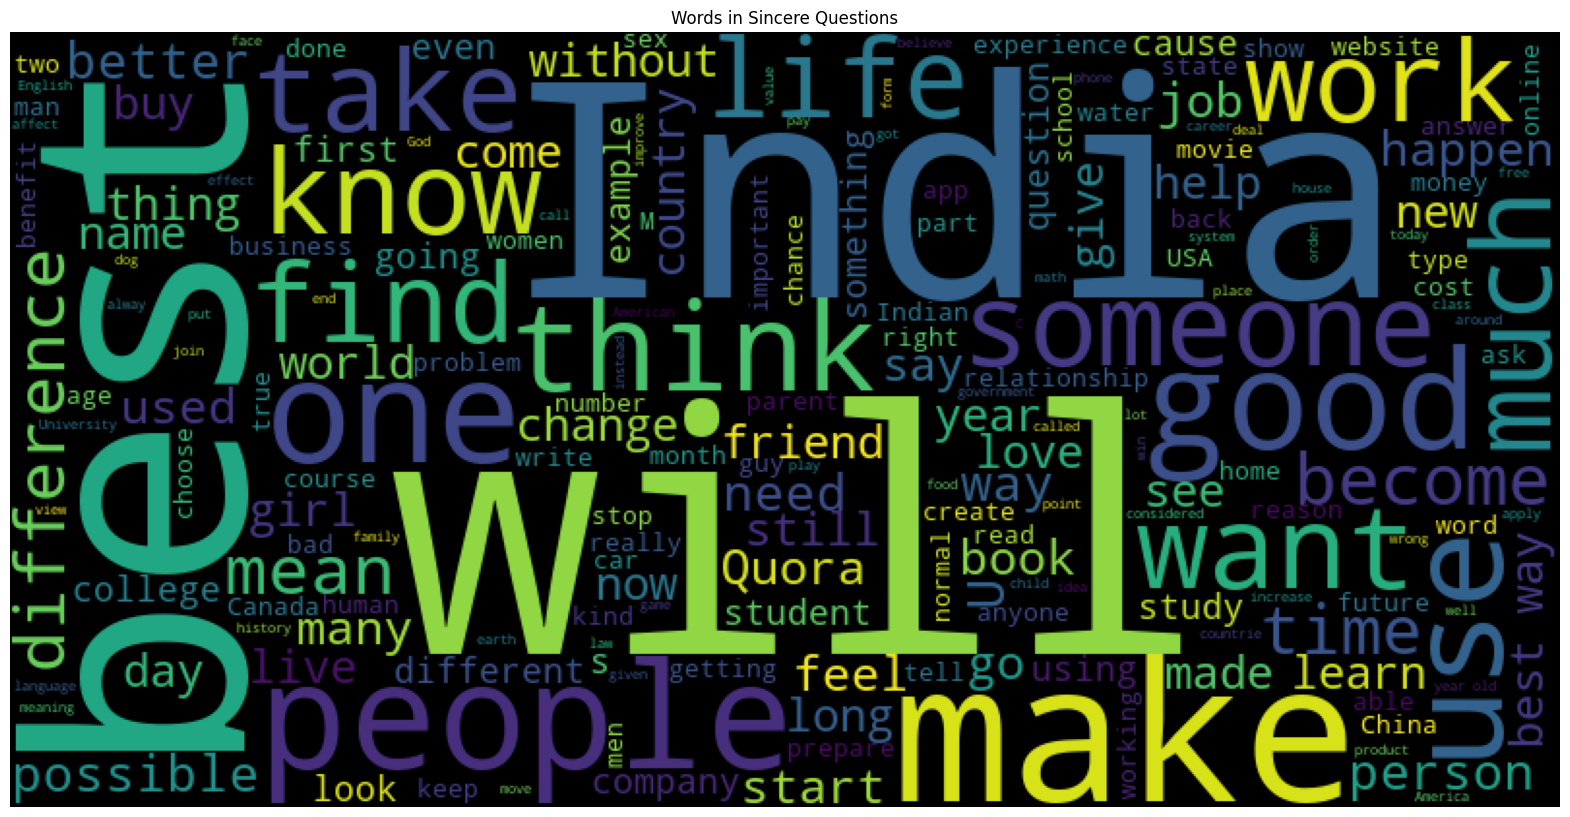

In [8]:
# Wordcloud for Sincere Questions
display_wordcloud(df_train[df_train['target']==0]['question_text'], 'Sincere Questions')

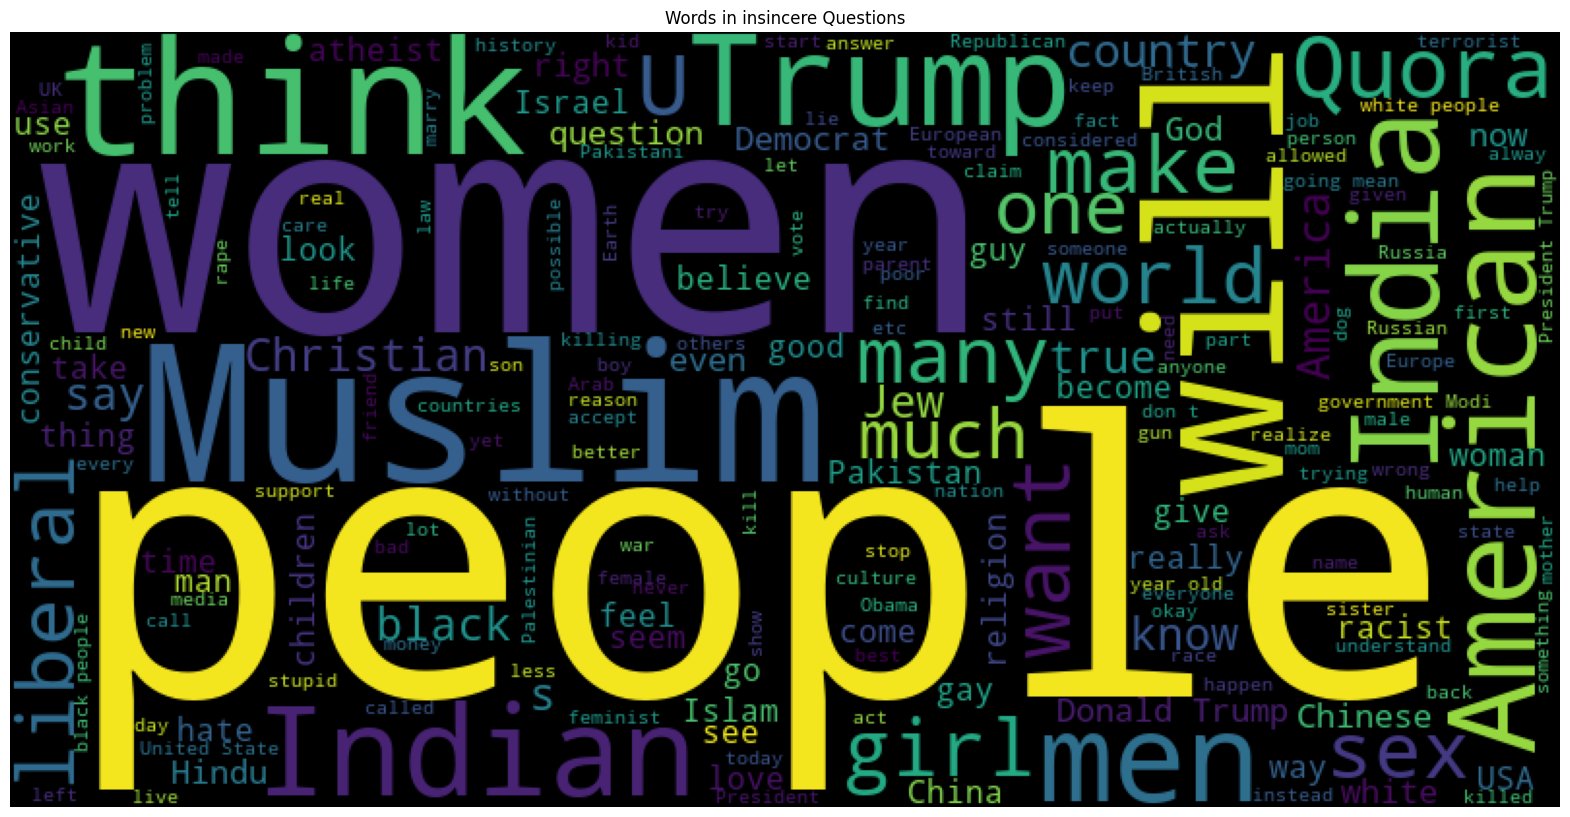

In [9]:
# Wordcloud for Sincere Questions
display_wordcloud(df_train[df_train['target']==1]['question_text'], 'insincere Questions')

Observations:
- insincere qiestions contain offensive words
- most of the questions are related to People, Muslim, Women,Trump etc

In [10]:

def plot_word_freq(data, title, bar_color):
    
  top_words = Counter(data).most_common(10) #top 10 words

  df_top = pd.DataFrame(top_words, columns=['word', 'count']).sort_values('count') # storing in df

  plt.barh(df_top['word'].values, df_top['count'].values, orientation='horizontal', color=bar_color) # plot
  plt.title(f'Top words in {title}')

def get_unigrams(data):
  unigrams = []
  for sent in data:
    unigrams.extend([w for w in sent.lower().split() if w not in STOPWORDS])
  return unigrams

def get_bigrams(data):
  bigrams = []
  for sent in data:
    sent = [w for w in sent.lower().split() if w not in STOPWORDS]
    bi = [b for b in nltk.bigrams(sent)]
    bi = [' '.join(w) for w in bi]
    bigrams.extend(bi)
  return bigrams
    
def get_trigrams(data):
  trigram = []
  for sent in data:
    sent = [w for w in sent.lower().split() if w not in STOPWORDS]
    tri = [b for b in nltk.trigrams(sent)]
    tri = [' '.join(w) for w in tri]
    trigram.extend(tri)
  return trigram

In [11]:
# Unigrams
unigrams_sincere  = get_unigrams(df_train[df_train['target']==0]['question_text'])
unigrams_insincere = get_unigrams(df_train[df_train['target']==1]['question_text'])

# Bigrams
bigrams_sincere = get_bigrams(df_train[df_train['target']==0]['question_text'])
bigrams_insincere = get_bigrams(df_train[df_train['target']==1]['question_text'])

# Trigrams
trigrams_sincere = get_trigrams(df_train[df_train['target']==0]['question_text'])
trigrams_insincere = get_trigrams(df_train[df_train['target']==1]['question_text'])

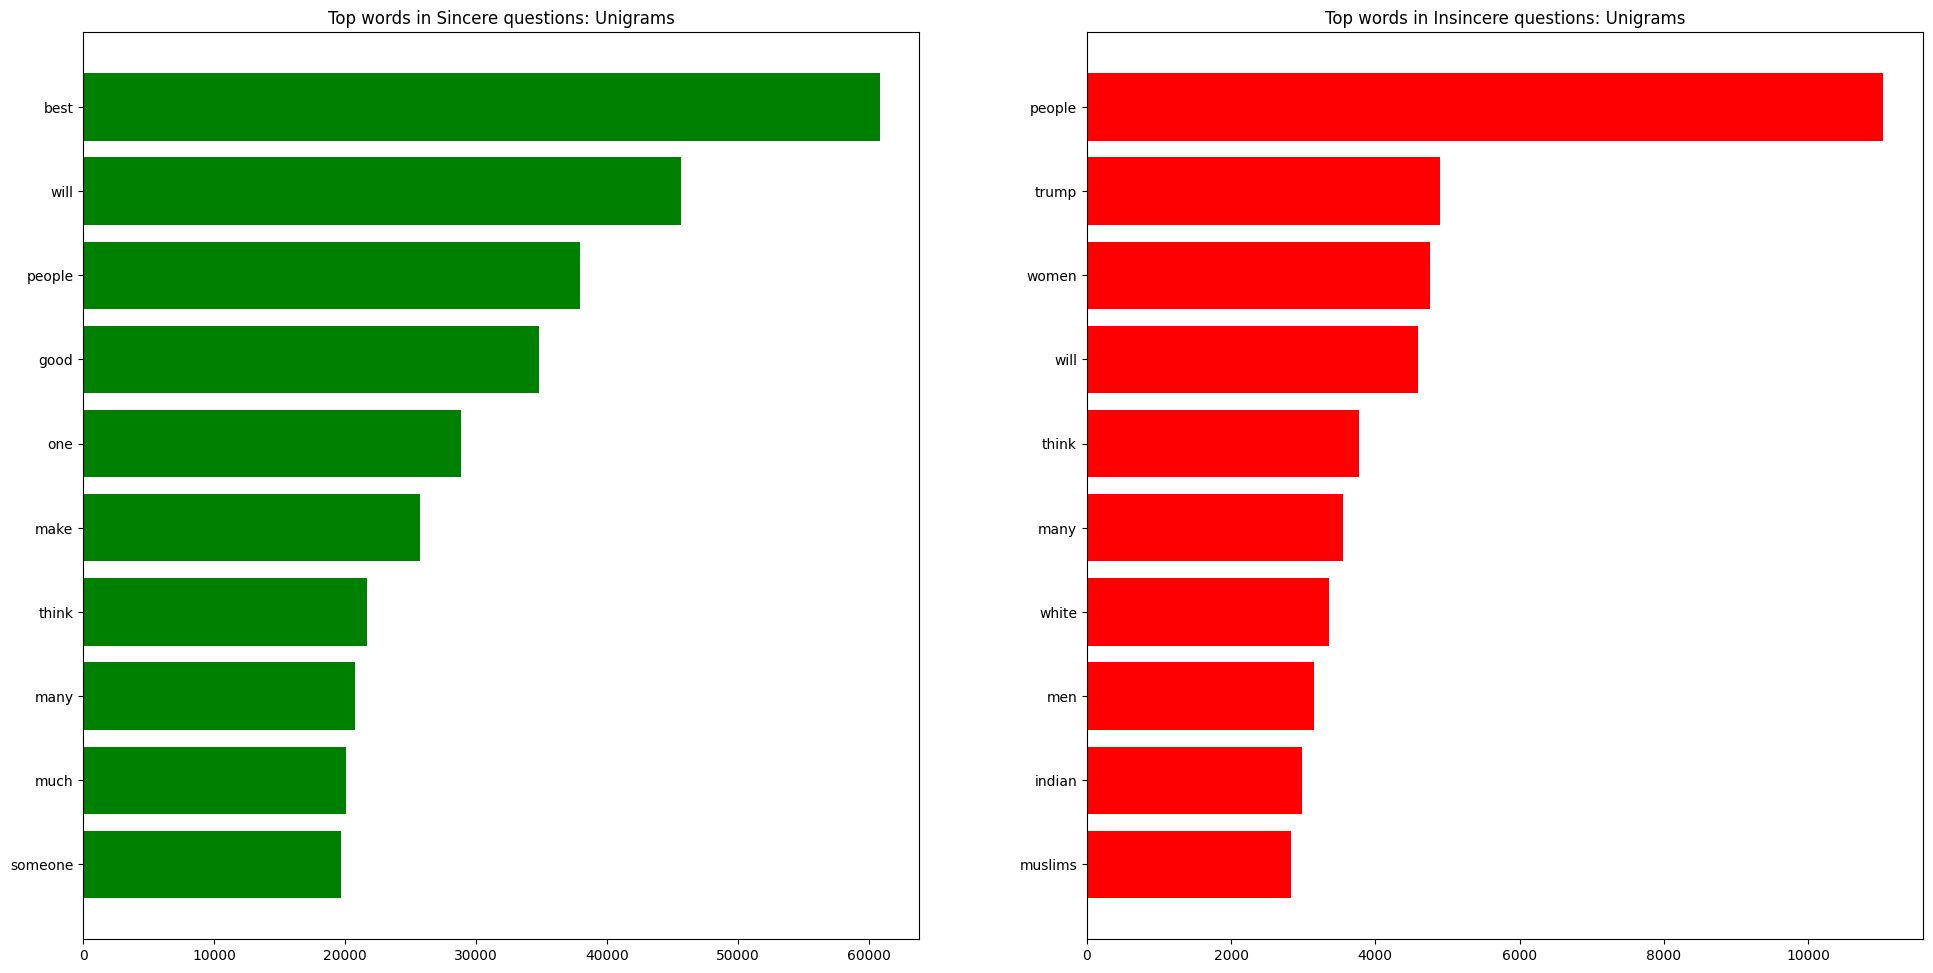

In [12]:
# Unigrams Sincere words
plt.subplot(1, 2, 1)
plot_word_freq(unigrams_sincere, 'Sincere questions: Unigrams', 'green')

# Unigrams Insincere words
plt.subplot(1, 2, 2)
plot_word_freq(unigrams_insincere, 'Insincere questions: Unigrams', 'red')
plt.subplots_adjust(right=3.0)
plt.subplots_adjust(top=2.0)
plt.show()

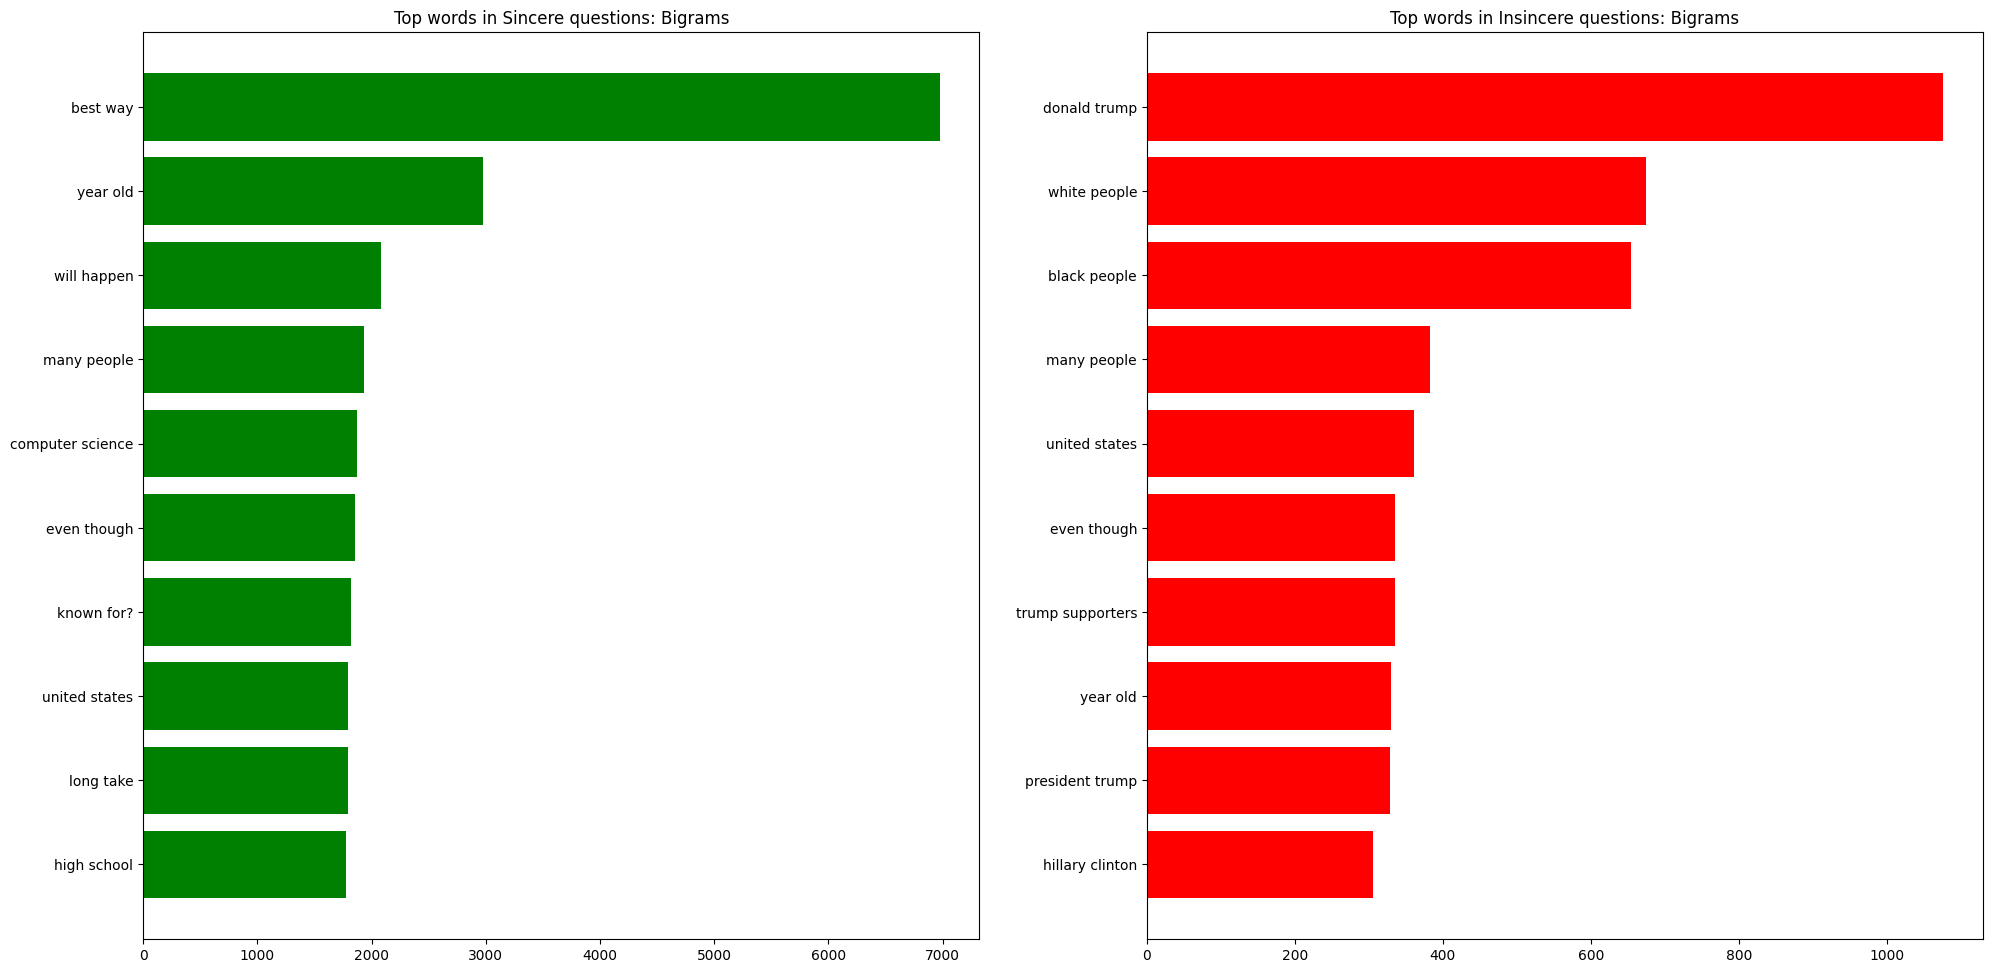

In [13]:
# Bigrams Sincere words
plt.subplot(1, 2, 1)
plot_word_freq(bigrams_sincere, 'Sincere questions: Bigrams', 'green')

# Bigrams Insincere words
plt.subplot(1, 2, 2)
plot_word_freq(bigrams_insincere, 'Insincere questions: Bigrams', 'red')
plt.subplots_adjust(right=3.0)
plt.subplots_adjust(top=2.0)
plt.show()

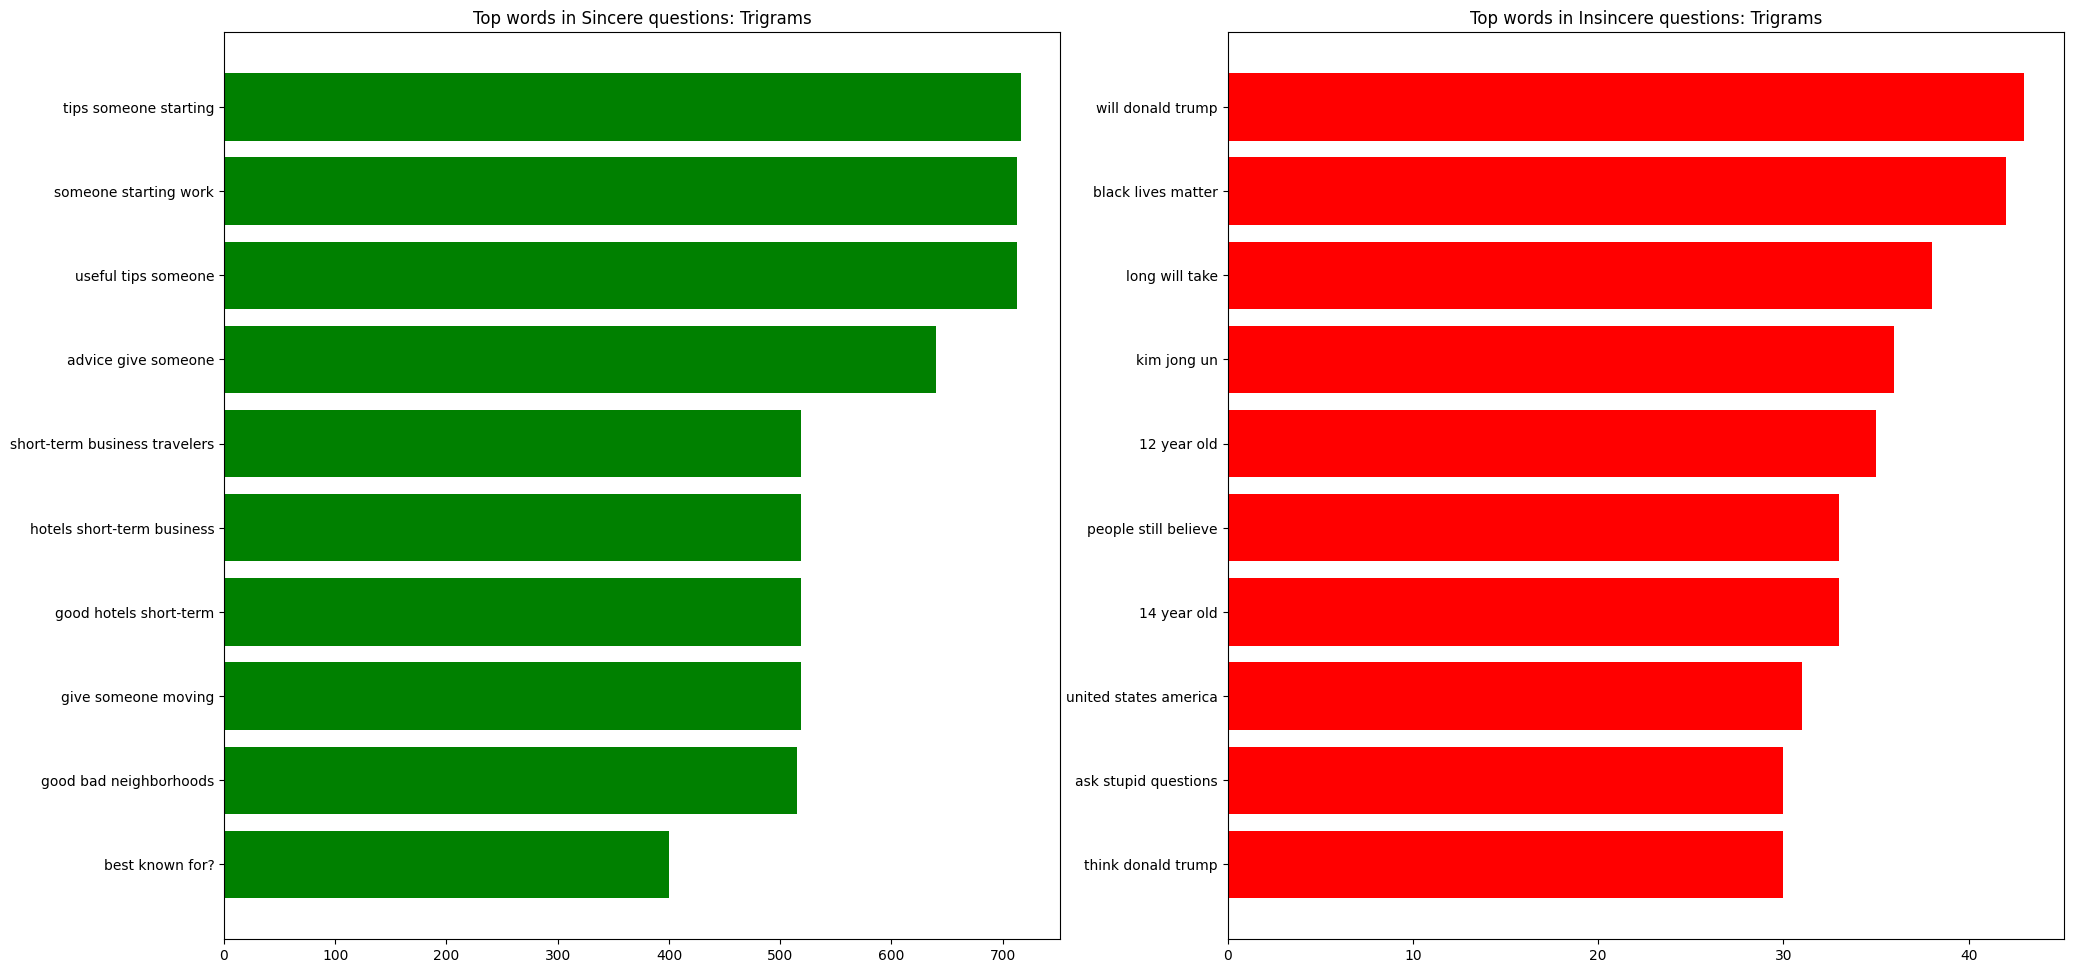

In [14]:
# Trigrams Sincere words
plt.subplot(1, 2, 1)
plot_word_freq(trigrams_sincere, 'Sincere questions: Trigrams', 'green')

# Trigrams Insincere words
plt.subplot(1, 2, 2)
plot_word_freq(trigrams_insincere, 'Insincere questions: Trigrams', 'red')
plt.subplots_adjust(right=3.0)
plt.subplots_adjust(top=2.0)
plt.show()

In [15]:
# Number of words
df_train['num_words'] = df_train['question_text'].apply(lambda x: len(str(x).split()))
df_test['num_words'] = df_test['question_text'].apply(lambda x: len(str(x).split()))

# Number of capital_letters
df_train['num_capital_let'] = df_train['question_text'].apply(lambda x: len([c for c in str(x) if c.isupper()]))
df_test['num_capital_let'] = df_test['question_text'].apply(lambda x: len([c for c in str(x) if c.isupper()]))

# Number of special characters
df_train['num_special_char'] = df_train['question_text'].str.findall(r'[^a-zA-Z0-9 ]').str.len()
df_test['num_special_char'] = df_test['question_text'].str.findall(r'[^a-zA-Z0-9 ]').str.len()

# Number of unique words
df_train['num_unique_words'] = df_train['question_text'].apply(lambda x: len(set(str(x).split())))
df_test['num_unique_words'] = df_test['question_text'].apply(lambda x: len(set(str(x).split())))

# Number of numerics
df_train['num_numerics'] = df_train['question_text'].apply(lambda x: sum(c.isdigit() for c in x))
df_test['num_numerics'] = df_test['question_text'].apply(lambda x: sum(c.isdigit() for c in x))

# Number of characters
df_train['num_char'] = df_train['question_text'].apply(lambda x: len(str(x)))
df_test['num_char'] = df_test['question_text'].apply(lambda x: len(str(x)))

# Number of stopwords
df_train['num_stopwords'] = df_train['question_text'].apply(lambda x: len([c for c in str(x).lower().split() if c in STOPWORDS]))
df_test['num_stopwords'] = df_test['question_text'].apply(lambda x: len([c for c in str(x).lower().split() if c in STOPWORDS]))

df_train.head()

,qid,question_text,target,num_words,num_capital_let,num_special_char,num_unique_words,num_numerics,num_char,num_stopwords
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,13,2,1,13,4,72,7
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,16,1,2,15,0,81,10
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,10,2,2,8,0,67,3
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,9,4,1,9,0,57,3
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,15,3,1,15,0,77,7


In [16]:
def display_boxplot(_x, _y, _data, _title):
    sns.boxplot(x=_x, y=_y, data=_data)
    plt.grid(True)
    plt.title(_title)

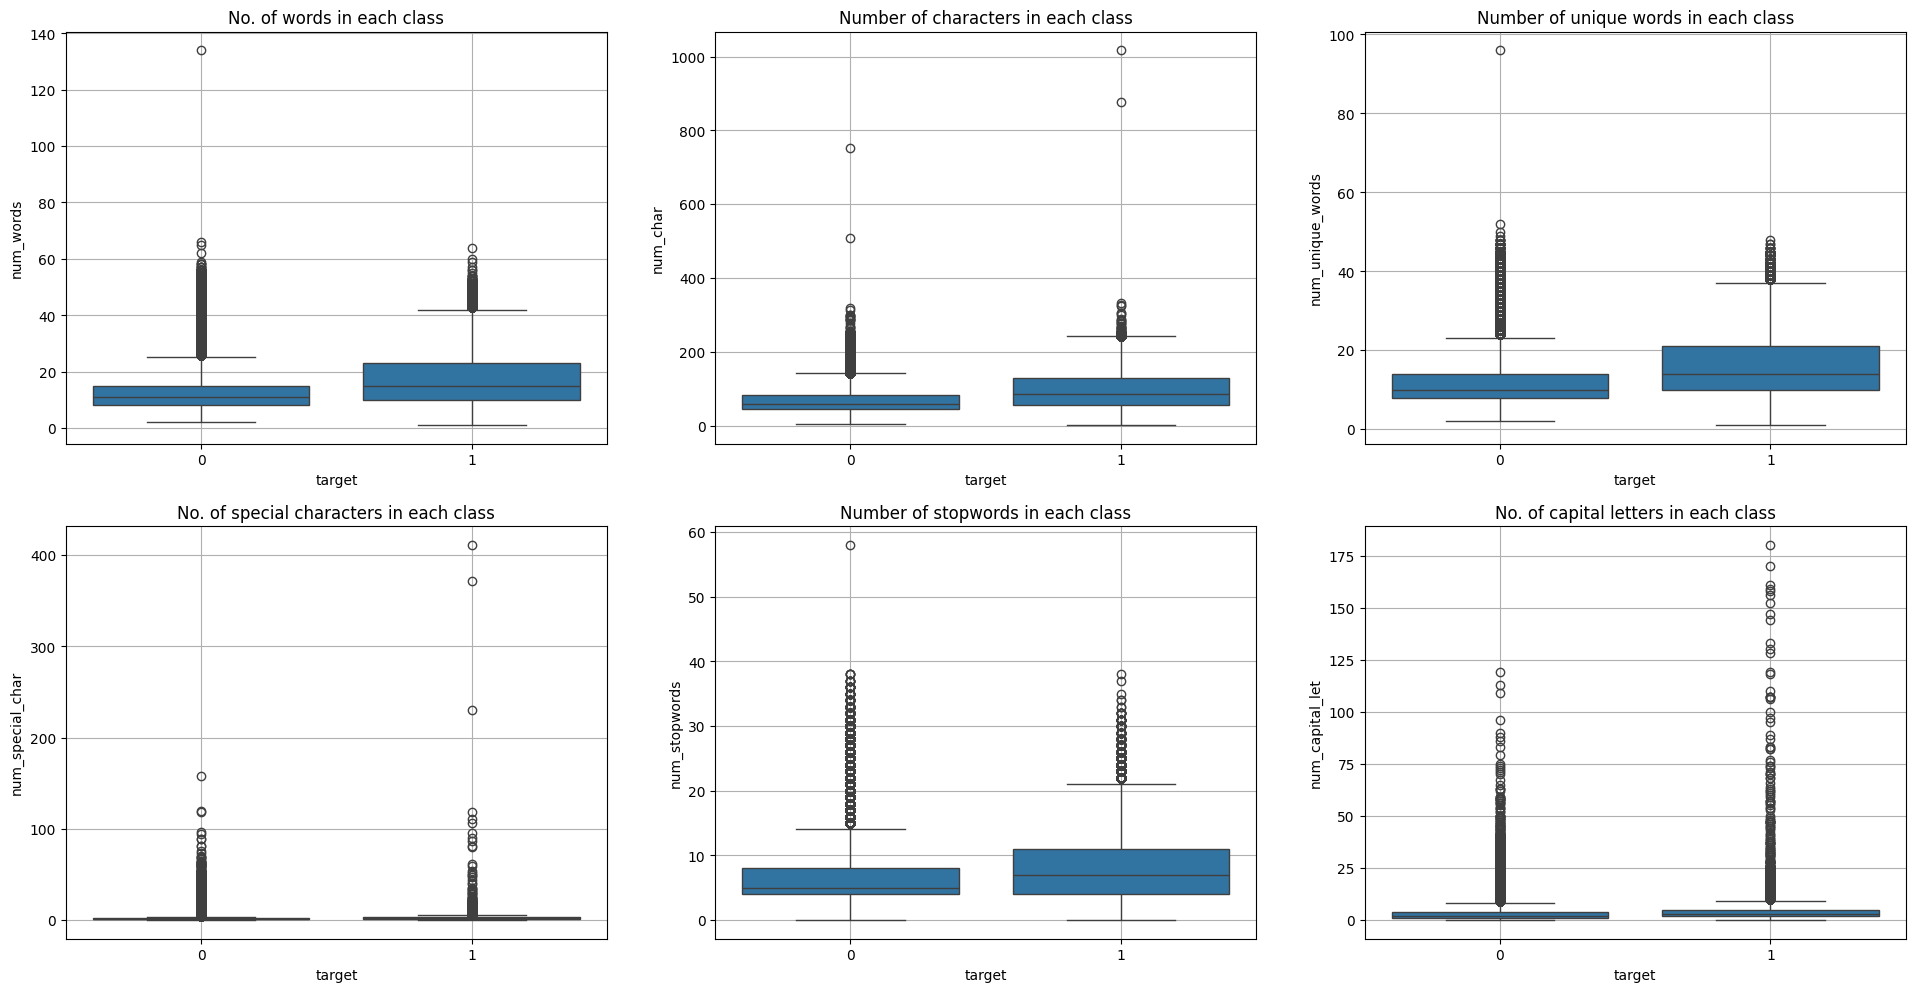

In [17]:
# Boxplot: Number of words
plt.subplot(2, 3, 1)
display_boxplot('target', 'num_words', df_train, 'No. of words in each class')

# Boxplot: Number of chars
plt.subplot(2, 3, 2)
display_boxplot('target', 'num_char', df_train, 'Number of characters in each class')

# Boxplot: Number of unique words
plt.subplot(2, 3, 3)
display_boxplot('target', 'num_unique_words', df_train, 'Number of unique words in each class')

# Boxplot: Number of special characters
plt.subplot(2, 3, 4)
display_boxplot('target', 'num_special_char', df_train, 'No. of special characters in each class')

# Boxplot: Number of stopwords
plt.subplot(2, 3, 5)
display_boxplot('target', 'num_stopwords', df_train, 'Number of stopwords in each class')

# Boxplot: Number of capital letters
plt.subplot(2, 3, 6)
display_boxplot('target', 'num_capital_let', df_train, 'No. of capital letters in each class')


plt.subplots_adjust(right=3.0)
plt.subplots_adjust(top=2.0)
plt.show()

Observations:
- number of words used are more in case of insincere questions

In [20]:
def get_all_symbols(data):
  """
  Returns SET: special symbols in corpus
  """
  
  symbols = []
  for text in data:
    s = re.findall(r'\W+', str(text))
    symbols.extend(s), 
  
  return set(symbols)
extracted_symbols = get_all_symbols(df_train['question_text'].values)

In [21]:
extracted_symbols

{'!", ',
 '+…+(',
 '! ] ',
 '^{\\',
 ')))?',
 ')}[\\',
 '”)',
 '}}-\\',
 ': “[',
 '®™ ',
 ' #*$& ',
 '++^',
 '})^{',
 ' -$',
 '\\, ,\\; \\; ',
 ' | + | ',
 '? (~$',
 './',
 ':} ',
 ' :-)',
 '] / (',
 '}=',
 'ા',
 "ை '?",
 ' √(-',
 ', (√',
 '=?',
 ')/',
 '|)^',
 '̂',
 ' " [',
 ' :-( ',
 ')+',
 '> (',
 '!”, ',
 ' …", ',
 '? - (',
 ' "?',
 "') ∩ ",
 '} ;',
 '?)? ',
 '" — ',
 '˜',
 '(√',
 ') & -',
 '=(',
 ' }\\',
 '] ',
 ') >=',
 ' –∆',
 '$ , ',
 '—',
 ')! ',
 ') ×+',
 '°',
 '|\\',
 ' 《',
 ' )}\\, ',
 '", " ',
 '" (?) ',
 "'| + |",
 ' } }{',
 '+…=?',
 "('",
 ')]} ',
 ') ^- ',
 ' +×-= -?',
 '™?',
 ' ＞',
 '.?)',
 '° . ',
 '-(-',
 '= |',
 '̅ ',
 '} (-',
 ' ?? ',
 ';"',
 ':\\',
 ')} [\\',
 '∘',
 '^+}',
 '\ufeff.?',
 "ை ' ",
 'ೋ',
 ']? ?',
 ') , ',
 "', ['$",
 "' \\\\ ",
 ' ((((',
 'া',
 '.&',
 '”，“',
 '×=?',
 ' +∞?',
 '-×-×',
 ')\xa0',
 ' -\\',
 '°) * (',
 '] ([',
 '/] ',
 '?".',
 '#)?',
 ' ‘‘',
 ']?”?',
 '} ( ',
 ' *" ',
 '}} \\, ',
 ' :/',
 ' ,"',
 ")))'",
 ',\'" ',
 ' / ₹',
 '/. ',
 '!") ',